<a href="https://colab.research.google.com/github/HowardHNguyen/Python/blob/main/Estimating_AR_Model_%26_Forecasting_with_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimating an AR Model

## Introduction to Autoregression Model

An autoregression model is a regression with a time series and itself, shifted by a time step or steps. These are called lags.  I will demonstrate with five examples with the non-stationarized datasets so that you can see the results in the original dataset along with the forecasted dataset.

In [ ]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf

###  Example 1: Vacation dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read in vacation dataset
vacation = read_csv('/content/drive/MyDrive/_Python/Time-Series-Analysis-with-Python-3.x-master/Section 3/df_vacation.csv', index_col=0, parse_dates=True)
vacation.head()

,Num_Search_Vacation
Month,
2004-01-01,94
2004-02-01,89
2004-03-01,86
2004-04-01,79
2004-05-01,89


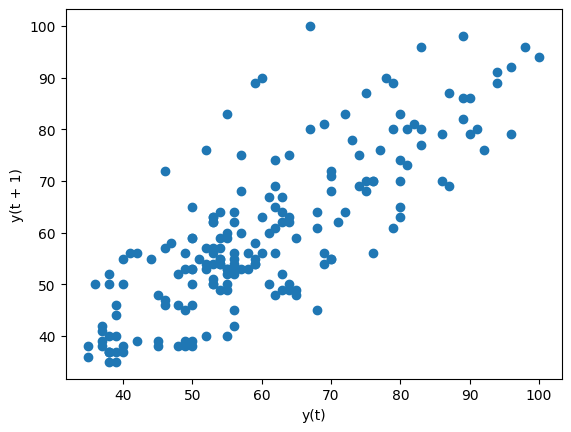

In [ ]:
# Plot the time series against its lag
lag_plot(vacation)
pyplot.show()

In [ ]:
from pandas import concat

values = pd.DataFrame(vacation.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.797406
t+1  0.797406  1.000000


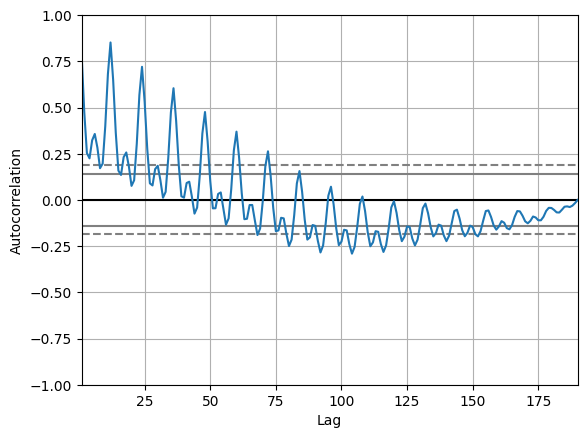

In [ ]:
# Plot the autocorrelation of the dataset
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(vacation)
pyplot.show()

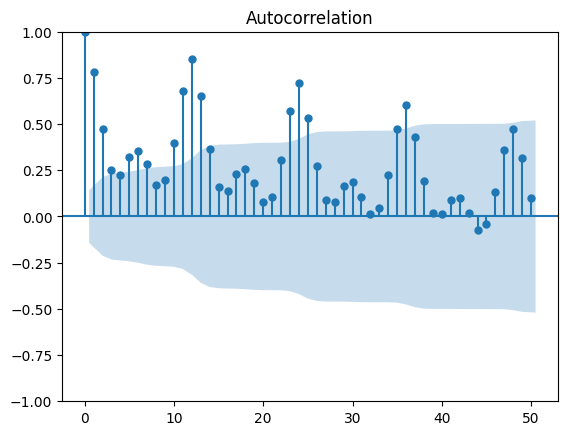

In [ ]:
# Plot the Autocorrelation Function, using candle sticks

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(vacation, lags=50)
pyplot.show()

In [ ]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Estimating an AR Model

# Import the ARMA module from statsmodels
#from statsmodels.tsa.arima.model import ARMA
#from statsmodels.tsa.arima_model import ARIMA

# Fit an AR(1) model to the first simulated data
mod = ARIMA(vacation, order=(1, 0,0))  # fit data to an AR1 model

res = mod.fit()  # use fit() to estimate model

# Print out summary information on the fit
print(res.summary())

print(res.params)
# Estimated parameters are close to true parameters

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                
Dep. Variable:     Num_Search_Vacation   No. Observations:                  190
Model:                  ARIMA(1, 0, 0)   Log Likelihood                -694.604
Date:                 Mon, 05 Jun 2023   AIC                           1395.209
Time:                         15:10:17   BIC                           1404.950
Sample:                     01-01-2004   HQIC                          1399.155
                          - 10-01-2019                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.4407      3.676     16.442      0.000      53.236      67.646
ar.L1          0.8079      0.052     15.653      0.000       0.707       0.909
sigma2        87.1985      7.803     11.175 

The best model chosen is the one with the lowest Information Criterion.  The AIC shows the lowest.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
vacation.tail()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


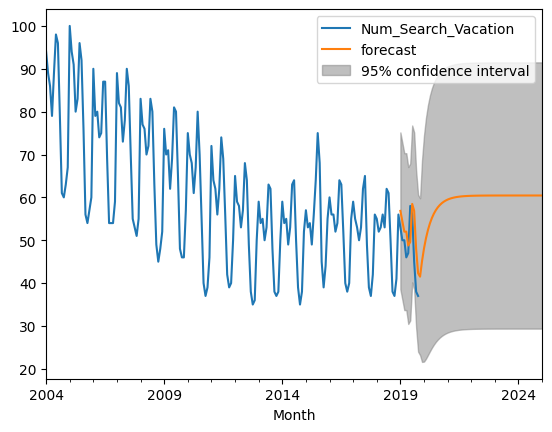

In [ ]:
# Forecasting
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
# Forecast the first AR(1) model
#mod = ARMA(vacation, order=(1,0))
#res = mod.fit()
# Start the forecast 10 data points before the end of the  point series at , 
#and end the forecast 10 data points after the end of the series at point 
#res.plot_predict(start='2015', end='2025')
#plt.show()
mod = ARIMA(vacation, order=(1, 0,0))  # fit data to an AR1 model
res = mod.fit()  # use fit() to estimate model

fig, ax = plt.subplots()
ax = vacation.loc['2004':].plot(ax=ax)
plot_predict(res, '2019', '2025', ax=ax)
plt.show()

###  Example 2: Furniture dataset

In [ ]:
furn = read_csv('/content/drive/MyDrive/_Python/Time-Series-Analysis-with-Python-3.x-master/Section 3/df_furniture.csv', index_col=0, parse_dates=True)
furn.head()

,furniture_price_adjusted
Month,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618


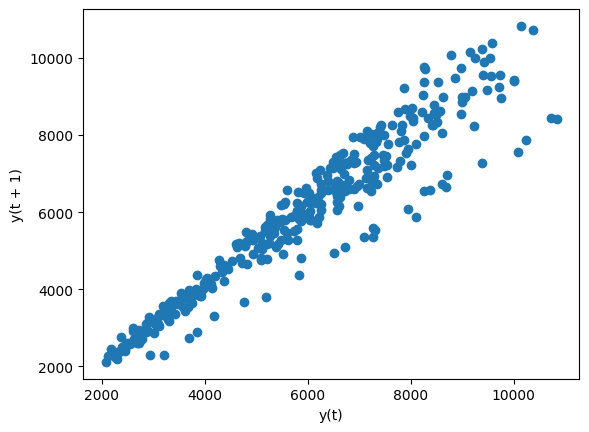

In [ ]:
# Plot the time series against its lag
lag_plot(furn)
pyplot.show()

In [ ]:
from pandas import concat

values = pd.DataFrame(furn.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.951005
t+1  0.951005  1.000000


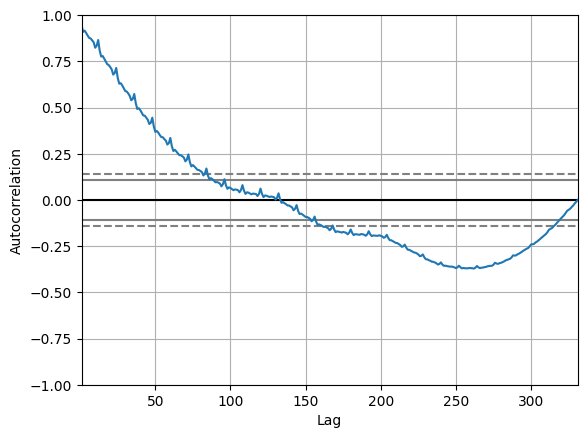

In [ ]:
# Plot the autocorrelation
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(furn)
pyplot.show()

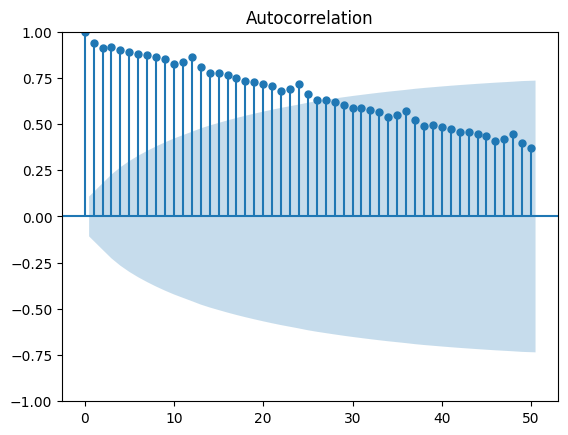

In [ ]:
# Plot the Autocorrelation Function, using candle sticks
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(furn, lags=50)
pyplot.show()

In [ ]:
# Estimating an AR Model

# Import the ARMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an AR(1) model to the first simulated data
mod = ARIMA(furn, order=(1,0,0))  # fit data to an AR1 model
res = mod.fit()  # use fit() to estimate model

# Print out summary information on the fit
print(res.summary())

print(res.params)
# Estimated parameters are close to true parameters

# S.D. of innovations is standard deviation of errors
# L1 is lag1
# fitted model parameters

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                  SARIMAX Results                                   
Dep. Variable:     furniture_price_adjusted   No. Observations:                  331
Model:                       ARIMA(1, 0, 0)   Log Likelihood               -2612.843
Date:                      Mon, 05 Jun 2023   AIC                           5231.687
Time:                              21:08:55   BIC                           5243.093
Sample:                          01-01-1992   HQIC                          5236.236
                               - 07-01-2019                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5975.7665    810.809      7.370      0.000    4386.611    7564.922
ar.L1          0.9577      0.016     59.841      0.000       0.926       0.989
sigm

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


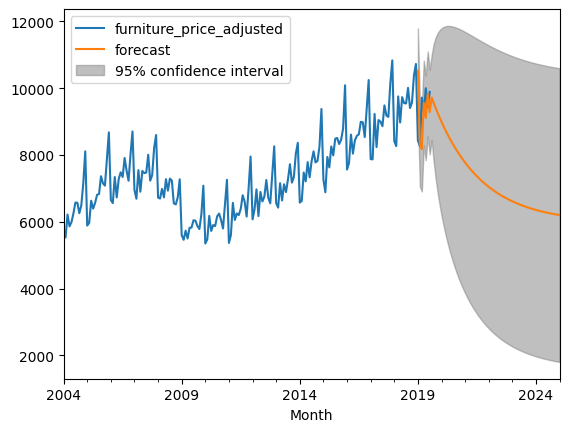

In [ ]:
# Import the ARMA module from statsmodels
#from statsmodels.tsa.arima_model import ARMA
# Forecast the first AR(1) model
#mod = ARMA(furn, order=(1,0))
#res = mod.fit()
# Start the forecast 10 data points before the end of the  point series at , 
#and end the forecast 10 data points after the end of the series at point 
#res.plot_predict(start='2015', end='2025')
#pyplot.show()

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

mod = ARIMA(furn, order=(1, 0,0))  # fit data to an AR1 model
res = mod.fit()  # use fit() to estimate model

fig, ax = plt.subplots()
ax = furn.loc['2004':].plot(ax=ax)
plot_predict(res, '2019', '2025', ax=ax)
plt.show()

###  Example 3: Bank of America dataset

In [ ]:
# Read in BOA dataset, this is original with resampling to monthly data
bac= read_csv('/content/drive/MyDrive/_Python/Time-Series-Analysis-with-Python-3.x-master/Section 3/df_bankofamerica.csv', index_col=0, parse_dates=True)
# convert daily data to monthly
bac= bac.resample(rule='M').last()
bac.head()

,Adj Close Price
Date,
1990-01-31,1.542054
1990-02-28,1.687537
1990-03-31,1.469485
1990-04-30,1.441042
1990-05-31,1.525887


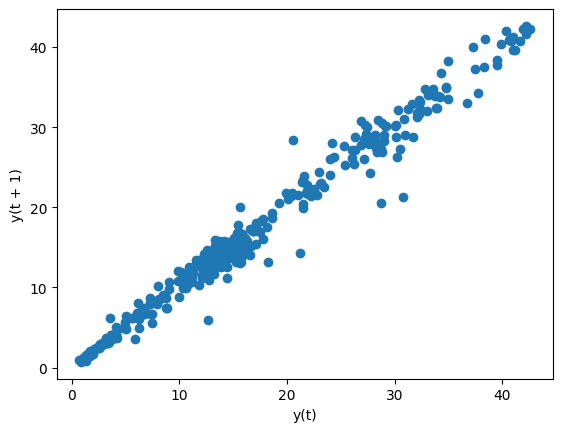

In [ ]:
# Plot the time series against its lag
lag_plot(bac)
pyplot.show()

In [ ]:
from pandas import concat

values = pd.DataFrame(bac.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.989824
t+1  0.989824  1.000000


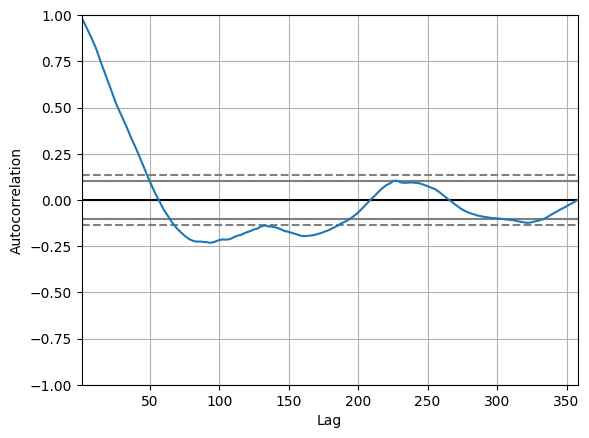

In [ ]:
# Plot the autocorrelation
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(bac)
pyplot.show()

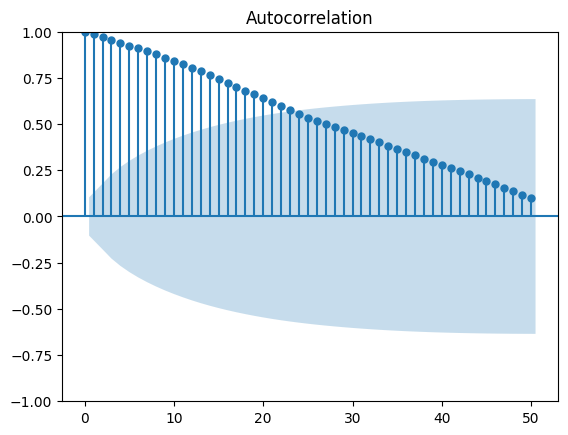

In [ ]:
# Plot the Autocorrelation Function, using candle sticks
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(bac, lags=50)
pyplot.show()

In [ ]:
# Estimating an AR Model

# Import the ARMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an AR(1) model to the first simulated data
mod = ARIMA(bac, order=(1,0,0))  # fit data to an AR1 model
res = mod.fit()  # use fit() to estimate model

# Print out summary information on the fit
print(res.summary())

print(res.params)
# Estimated parameters are close to true parameters

# S.D. of innovations is standard deviation of errors
# L1 is lag1
# fitted model parameters

                               SARIMAX Results                                
Dep. Variable:        Adj Close Price   No. Observations:                  358
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -668.617
Date:                Mon, 05 Jun 2023   AIC                           1343.235
Time:                        21:40:39   BIC                           1354.877
Sample:                    01-31-1990   HQIC                          1347.865
                         - 10-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.3562      6.992      2.339      0.019       2.652      30.060
ar.L1          0.9913      0.008    121.833      0.000       0.975       1.007
sigma2         2.4256      0.086     28.290      0.0

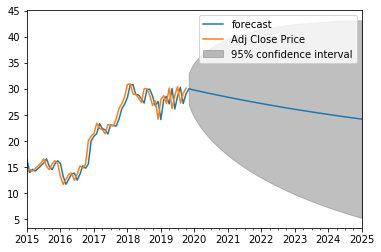

In [ ]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
# Forecast the first AR(1) model
mod = ARMA(bac, order=(1,0))
res = mod.fit()
# Start the forecast 10 data points before the end of the  point series at , 
#and end the forecast 10 data points after the end of the series at point 
res.plot_predict(start='2015', end='2025')
pyplot.show()

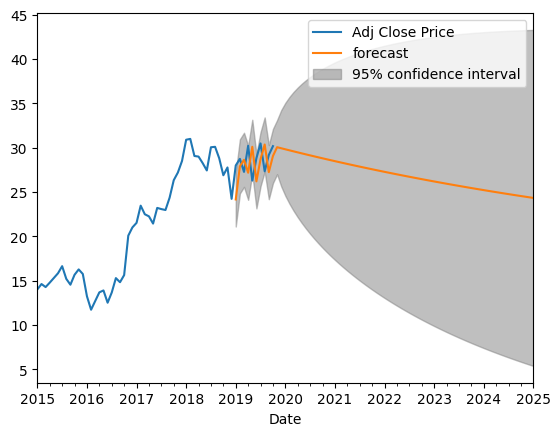

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

mod = ARIMA(bac, order=(1, 0,0))  # fit data to an AR1 model
res = mod.fit()  # use fit() to estimate model

fig, ax = plt.subplots()
ax = bac.loc['2015':].plot(ax=ax)
plot_predict(res, '2019', '2025', ax=ax)
plt.show()

###  Example 4: J.P. Morgan dataset

In [ ]:
# Read in JPM dataset
jpm = read_csv('/content/drive/MyDrive/_Python/Time-Series-Analysis-with-Python-3.x-master/Section 3/df_jpmorgan.csv', index_col=0, parse_dates=True)
# Convert the daily data to quarterly
jpm= jpm.resample(rule='Q').last()  # resample to quarterly data
jpm.head()

,Adj Close Price
Date,
1990-03-31,2.884144
1990-06-30,3.223591
1990-09-30,2.019471
1990-12-31,1.427535
1991-03-31,2.340254


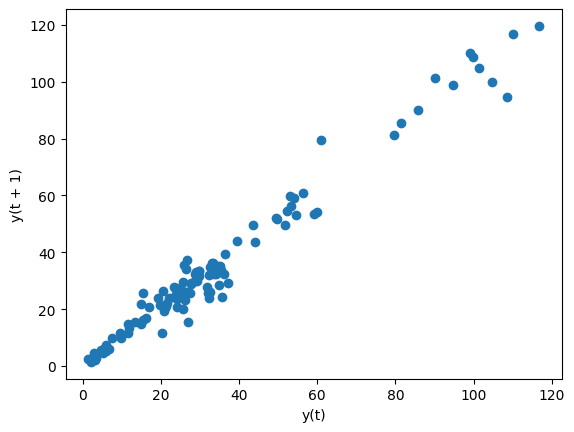

In [ ]:
# Plot the time series against its lag
lag_plot(jpm)
pyplot.show()

In [ ]:
from pandas import concat

values = pd.DataFrame(jpm.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.985934
t+1  0.985934  1.000000


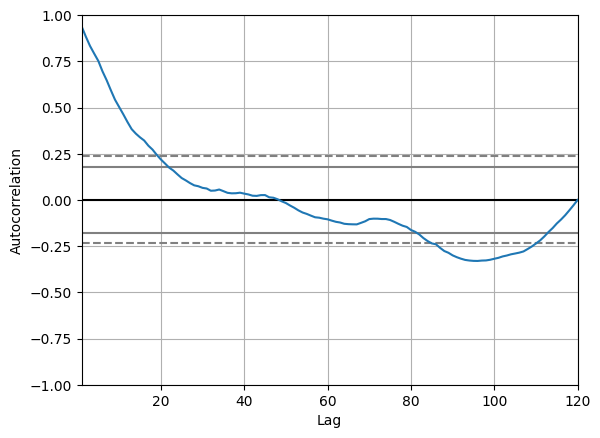

In [ ]:
# Plot the autocorrelation
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(jpm)
pyplot.show()

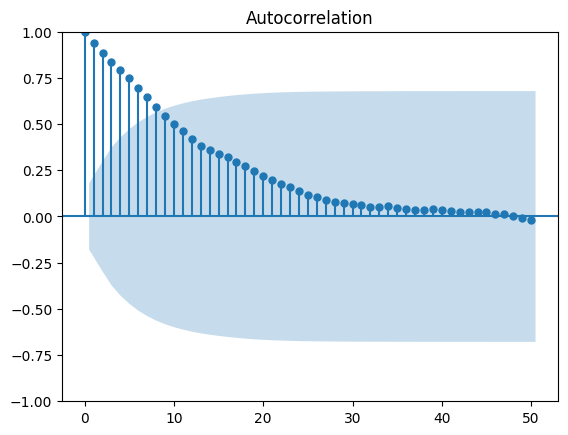

In [ ]:
# Plot the Autocorrelation Function, using candle sticks
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(jpm, lags=50)
pyplot.show()

In [ ]:
# Estimating an AR Model

# Import the ARMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an AR(1) model to the first simulated data
mod = ARIMA(jpm, order=(1,0,0))  # fit data to an AR1 model
res = mod.fit()  # use fit() to estimate model

# Print out summary information on the fit
print(res.summary())

print(res.params)
# Estimated parameters are close to true parameters

# S.D. of innovations is standard deviation of errors
# L1 is lag1
# fitted model parameters

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:        Adj Close Price   No. Observations:                  120
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -359.155
Date:                Mon, 05 Jun 2023   AIC                            724.311
Time:                        21:45:17   BIC                            732.673
Sample:                    03-31-1990   HQIC                           727.707
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.7074     46.624      1.195      0.232     -35.673     147.088
ar.L1          0.9959      0.014     72.016      0.000       0.969       1.023
sigma2        22.3773      2.029     11.026      0.0

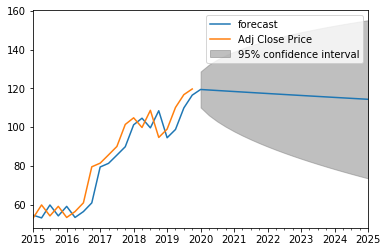

In [ ]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
mod = ARMA(jpm, order=(1,0))
res = mod.fit()

# Start the forecast 10 data points before the end of the  point series at , 
#and end the forecast 10 data points after the end of the series at point 
res.plot_predict(start='2015', end='2025')
pyplot.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


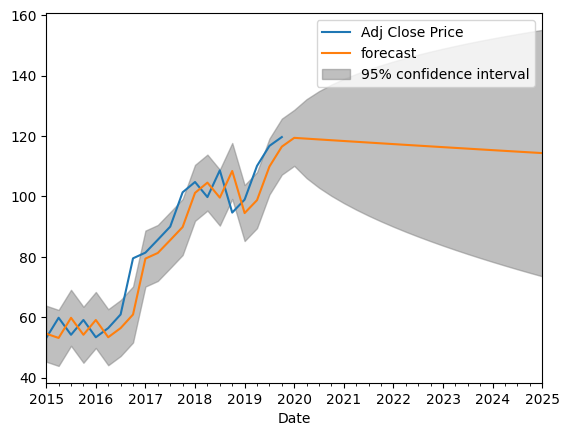

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

mod = ARIMA(jpm, order=(1, 0,0))  # fit data to an AR1 model
res = mod.fit()  # use fit() to estimate model

fig, ax = plt.subplots()
ax = jpm.loc['2015':].plot(ax=ax)
plot_predict(res, '2015', '2025', ax=ax)
plt.show()

###  Example 5: Average Temperature of St. Louis dataset

In [ ]:
# Read in temp dataset
temp = read_csv('/content/drive/MyDrive/_Python/Time-Series-Analysis-with-Python-3.x-master/Section 3/df_temp.csv', index_col=0, parse_dates=True)
temp.head()

,Value
Date,
1938-04-01,56.5
1938-05-01,64.7
1938-06-01,73.5
1938-07-01,80.4
1938-08-01,81.3


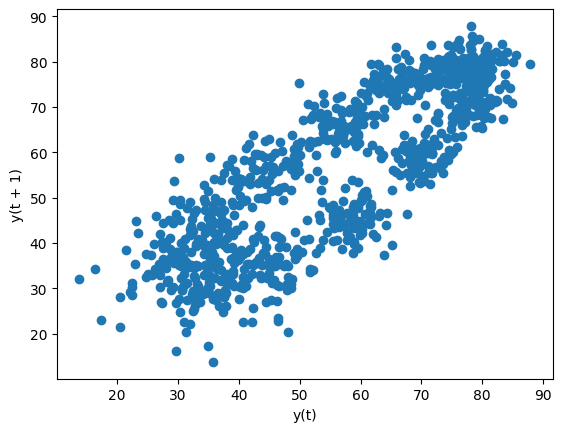

In [ ]:
# Plot the time series against its lag
lag_plot(temp)
pyplot.show()

In [ ]:
from pandas import concat

values = pd.DataFrame(temp.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)


          t-1       t+1
t-1  1.000000  0.833097
t+1  0.833097  1.000000


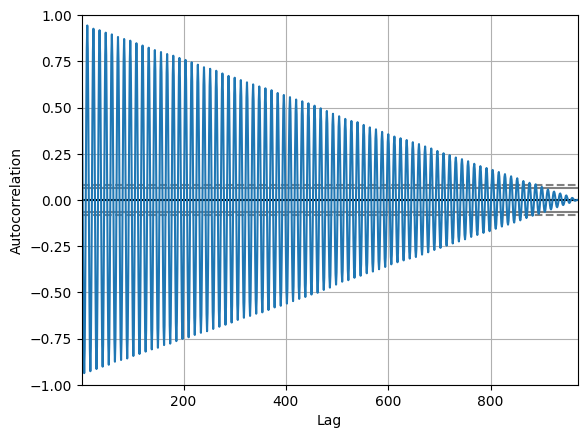

In [ ]:
# Plot the autocorrelation
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(temp)
pyplot.show()

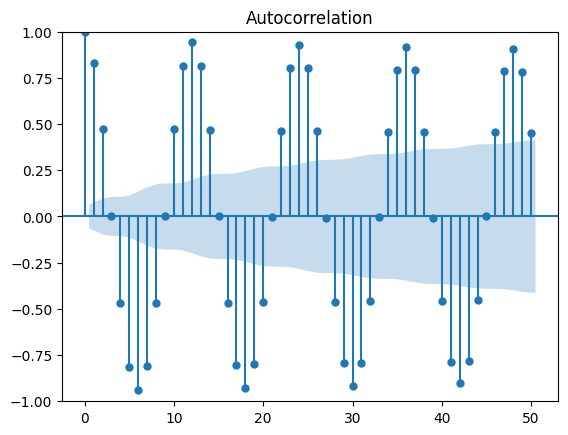

In [ ]:
# Plot the Autocorrelation Function, using candle sticks
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(temp, lags=50)
pyplot.show()

In [ ]:
# Estimating an AR Model

# Import the ARMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an AR(1) model to the first simulated data
mod = ARIMA(temp, order=(1,0,0))  # fit data to an AR1 model
res = mod.fit()  # use fit() to estimate model

# Print out summary information on the fit
print(res.summary())

print(res.params)
# Estimated parameters are close to true parameters

# S.D. of innovations is standard deviation of errors
# L1 is lag1
# fitted model parameters

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  970
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3580.547
Date:                Mon, 05 Jun 2023   AIC                           7167.095
Time:                        21:48:07   BIC                           7181.727
Sample:                    04-01-1938   HQIC                          7172.664
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.3173      1.929     29.188      0.000      52.536      60.099
ar.L1          0.8332      0.022     37.744      0.000       0.790       0.876
sigma2        94.0127      5.626     16.711      0.0

/Users/karenyang/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


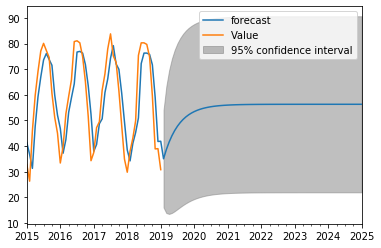

In [ ]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
mod = ARMA(temp, order=(1,0))
res = mod.fit()


# Start the forecast 10 data points before the end of the  point series at , 
#and end the forecast 10 data points after the end of the series at point 
res.plot_predict(start='2015', end='2025')
pyplot.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


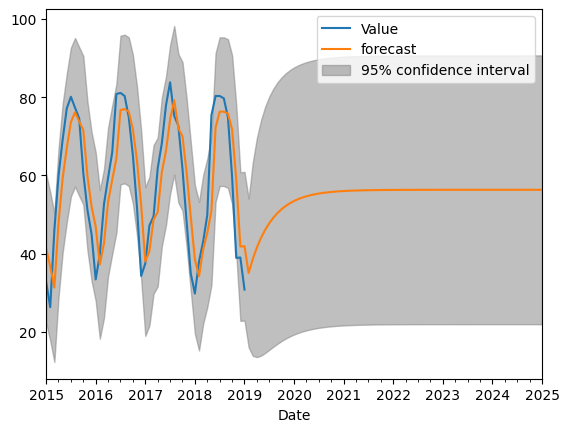

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

mod = ARIMA(temp, order=(1, 0,0))  # fit data to an AR1 model
res = mod.fit()  # use fit() to estimate model

fig, ax = plt.subplots()
ax = temp.loc['2015':].plot(ax=ax)
plot_predict(res, '2015', '2025', ax=ax)
plt.show()

In [ ]:
# end